# EQUAL-WIDTH DISCRETISATION
 - rozdělení souboru na kategorie o stejně velkém rozsahu, nezávisle na počtu případů v dané kategorii
 - s dostatečným počtem kategorií lze poměrně věrohodně reprezentovat původní rozdělení datového setu
 
 šířka intervalu je:  
 _w = (max-min)/k_  
   
 hranice intervalu jsou:  
 _min+w, min+2w, ... , min+(k-1)w_

In [58]:
#import knihoven
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer
from feature_engine.discretisers import EqualWidthDiscretiser
from sklearn import datasets

In [59]:
df= pd.read_csv('rfm_vstup_1.csv',sep=",", encoding='utf8', index_col='ID_CLIENT')
print(df.head())

              RECENCY  FREQUENCY  MONETARY_VALUE  RECENCY_DAYS
ID_CLIENT                                                     
72327      2019-05-25          2            2000           548
72361      2019-10-29       7798         7835759           391
72371      2017-06-27         15           19500          1245
72455      2018-11-25          2            2000           729
72462      2019-10-25        905         1900827           395


In [60]:
#identifikace outliera, který nám dělá v rozložení datasetu problém...
mini = round((df.min(axis=0,numeric_only=True))).astype(float)
print (mini[1])
outlier= df[df['MONETARY_VALUE']==mini[1]]
print(outlier)

-1519212475.0
              RECENCY  FREQUENCY  MONETARY_VALUE  RECENCY_DAYS
ID_CLIENT                                                     
309005     2019-10-29      22144     -1519212475           391


In [61]:
df.describe()

,FREQUENCY,MONETARY_VALUE,RECENCY_DAYS
count,272986.000000,2.729860e+05,272986.000000
mean,478.527272,4.670945e+05,660.288290
std,3826.201875,6.353549e+06,275.286489
min,1.000000,-1.519212e+09,391.000000
25%,3.000000,1.000000e+03,406.000000
50%,22.000000,1.560000e+04,573.000000
75%,124.000000,1.034445e+05,893.000000
max,200615.000000,9.199628e+08,1423.000000


In [73]:
max_bound = df.max(axis=0, numeric_only=True)
min_bound = df.min(axis=0,numeric_only=True)
num_bins = 15

w = (max_bound - min_bound) / num_bins
r = []
bin_labels = []
for i in range(0,num_bins+1):
    if i == 0:
        r.append((min_bound + i*w).astype(float)-1.0) 
    else:
        r.append((min_bound + i*w).astype(float))
        bin_labels.append(i)

#print pro kontrolu
print(w)
print(r)

FREQUENCY              1.337427e+04
MONETARY_VALUE         1.626117e+08
RECENCY_DAYS           6.880000e+01
FREQUENCY_w_10         6.000000e-01
MONETARY_VALUE_w_10    6.000000e-01
RECENCY_DAYS_w_10      6.000000e-01
FREQUENCY_w_5          2.666667e-01
MONETARY_VALUE_w_5     2.666667e-01
RECENCY_DAYS_w_5       2.666667e-01
OVERALL_SCORE_5        6.000000e-01
OVERALL_SCORE_10       1.400000e+00
dtype: float64
[FREQUENCY              0.000000e+00
MONETARY_VALUE        -1.519212e+09
RECENCY_DAYS           3.900000e+02
FREQUENCY_w_10         0.000000e+00
MONETARY_VALUE_w_10    0.000000e+00
RECENCY_DAYS_w_10      0.000000e+00
FREQUENCY_w_5          0.000000e+00
MONETARY_VALUE_w_5     0.000000e+00
RECENCY_DAYS_w_5       0.000000e+00
OVERALL_SCORE_5        4.000000e+00
OVERALL_SCORE_10       6.000000e+00
dtype: float64, FREQUENCY              1.337527e+04
MONETARY_VALUE        -1.356601e+09
RECENCY_DAYS           4.598000e+02
FREQUENCY_w_10         1.600000e+00
MONETARY_VALUE_w_10    1.600000e

In [74]:
def segment (bins, bin_labels, category_name):
    if category_name == 'RECENCY_DAYS':
        bin_labels = bin_labels[::-1]
    
    hodnota = pd.cut(df[category_name], bins, labels = bin_labels).astype(float)
    return hodnota


counter = 0
for kategorie in df.columns[1:4]:
    bins = [kateg_col[counter] for kateg_col in r]
    df[kategorie+'_w_'+str(num_bins)] = segment(bins, bin_labels, kategorie)
    counter += 1
    
print(df)

              RECENCY  FREQUENCY  MONETARY_VALUE  RECENCY_DAYS  \
ID_CLIENT                                                        
72327      2019-05-25          2            2000           548   
72361      2019-10-29       7798         7835759           391   
72371      2017-06-27         15           19500          1245   
72455      2018-11-25          2            2000           729   
72462      2019-10-25        905         1900827           395   
...               ...        ...             ...           ...   
657385     2019-10-29          1            5000           391   
657485     2019-10-29          1            1000           391   
657546     2019-10-29          2            2000           391   
657577     2019-10-29          2            2000           391   
657949     2019-10-29          1            1000           391   

           FREQUENCY_w_10  MONETARY_VALUE_w_10  RECENCY_DAYS_w_10  \
ID_CLIENT                                                           
723

In [67]:
df['OVERALL_SCORE_5'] = df['RECENCY_DAYS_w_5'] + df['FREQUENCY_w_5'] + df['MONETARY_VALUE_w_5']
df.groupby('OVERALL_SCORE_5')['RECENCY_DAYS','FREQUENCY','MONETARY_VALUE'].aggregate(['count', np.median, 'mean'])

c:\users\zuzan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


RECENCY_DAYS                      FREQUENCY            \
                       count  median         mean     count    median   
OVERALL_SCORE_5                                                         
5.0                        2  1345.5  1345.500000         2      76.0   
6.0                     9760  1327.0  1325.528996      9760       7.0   
7.0                    44242  1023.0  1052.353962     44242       1.0   
8.0                    25515   910.0   906.096806     25515      11.0   
9.0                    48313   694.0   695.585619     48313      15.0   
10.0                  144622   411.0   441.162984    144622      60.0   
11.0                     407   392.0   424.800983       407   54565.0   
12.0                      97   392.0   417.876289        97   90553.0   
13.0                      24   391.0   398.625000        24  133399.0   
14.0                       4   395.5   401.250000         4  193868.5   

                               MONETARY_VALUE                             
                          mean          count       median          mean  
OVERALL_SCORE_5                                                           
5.0                  76.000000              2 -260645069.0 -2.606451e+08  
6.0                 112.158709           9760       9000.0  5.453537e+04  
7.0                  64.846842          44242       1000.0  3.237021e+04  
8.0                 221.038683          25515      10000.0  1.865255e+05  
9.0                 238.502349          48313      13000.0  1.770089e+05  
10.0                507.411666         144622      39402.5  5.246798e+05  
11.0              56151.090909            407   52883238.0  5.999069e+07  
12.0              94889.164948             97   90496830.0  9.565782e+07  
13.0             136962.166667             24  114889257.5  9.852425e+07  
14.0             194295.000000              4  207678018.0  2.040696e+08

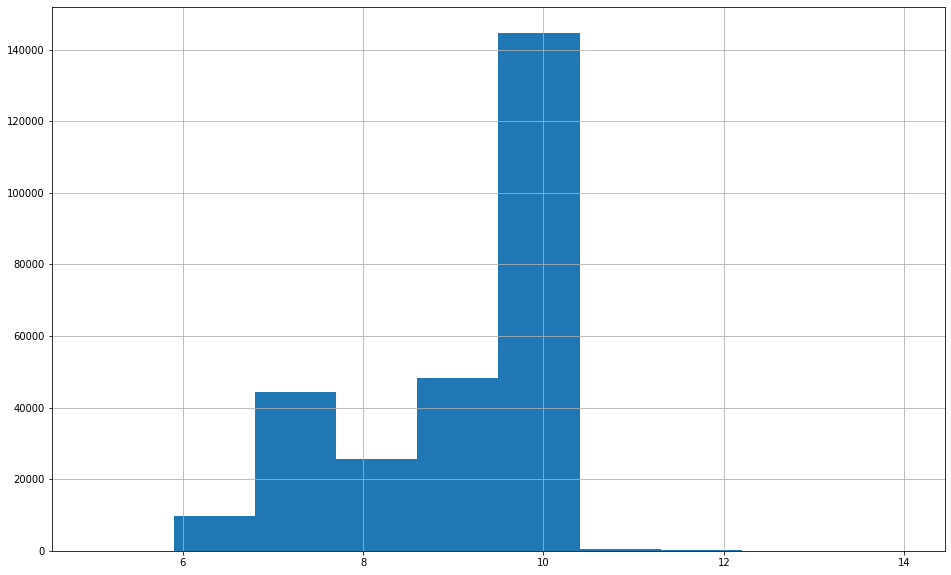

In [68]:
df['OVERALL_SCORE_5'].hist(figsize=(16,10), bins=10);

In [69]:
df['OVERALL_SCORE_10'] = df['RECENCY_DAYS_w_10'] + df['FREQUENCY_w_10'] + df['MONETARY_VALUE_w_10']
df.groupby('OVERALL_SCORE_10')['RECENCY_DAYS','FREQUENCY','MONETARY_VALUE'].aggregate(['count', np.median, 'mean'])

c:\users\zuzan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


RECENCY_DAYS                     FREQUENCY            \
                        count median         mean     count    median   
OVERALL_SCORE_10                                                        
7.0                         1   1373  1373.000000         1      46.0   
9.0                      5300   1371  1370.789623      5300       6.0   
10.0                     4456   1276  1271.787702      4456      10.0   
11.0                     7413   1154  1157.848374      7413       9.0   
12.0                    36816   1019  1031.158654     36816       1.0   
13.0                    12986    958   959.951640     12986      10.0   
14.0                    12512    847   850.504316     12512      12.0   
15.0                    22570    749   750.055383     22570      14.0   
16.0                    25682    648   648.303676     25682      16.0   
17.0                    29017    555   551.396182     29017      19.0   
18.0                   115170    400   413.679951    115170      77.0   
19.0                      569    392   417.219684       569   28987.0   
20.0                      236    392   412.588983       236   49070.5   
21.0                      138    391   408.985507       138   68074.0   
22.0                       64    392   416.203125        64   86388.5   
23.0                       29    392   406.448276        29  108301.0   
24.0                       15    391   391.400000        15  131860.0   
25.0                        7    391   391.142857         7  145649.0   
26.0                        1    391   391.000000         1  181811.0   
27.0                        1    423   423.000000         1  192178.0   
28.0                        3    391   394.000000         3  195559.0   

                                MONETARY_VALUE                             
                           mean          count       median          mean  
OVERALL_SCORE_10                                                           
7.0                   46.000000              1 -408912448.0 -4.089124e+08  
9.0                   46.494906           5300       7179.0  1.986042e+04  
10.0                 156.762792           4456      10144.5  8.854342e+04  
11.0                 142.421692           7413       9400.0  1.251944e+05  
12.0                  41.523740          36816       1000.0  4.402908e+04  
13.0                 168.702218          12986       9000.0  6.290007e+04  
14.0                 232.242967          12512      10000.0  2.156433e+05  
15.0                 199.294949          22570      12000.0  1.518566e+05  
16.0                 222.598396          25682      14000.0  2.182208e+05  
17.0                 285.556984          29017      14370.0  2.084939e+05  
18.0                 450.201346         115170      50259.0  4.699146e+05  
19.0               30639.179262            569   28693427.0  3.118566e+07  
20.0               49832.627119            236   45408964.5  5.464274e+07  
21.0               69774.572464            138   67131459.0  6.878595e+07  
22.0               89383.062500             64   84658654.0  9.029179e+07  
23.0              109509.206897             29  103664392.0  1.097032e+08  
24.0              130742.266667             15  115872669.0  1.052818e+08  
25.0              145013.428571              7  113905846.0  1.268525e+08  
26.0              181811.000000              1 -222643150.0 -2.226432e+08  
27.0              192178.000000              1  151686889.0  1.516869e+08  
28.0              195000.666667              3  212880319.0  2.215305e+08

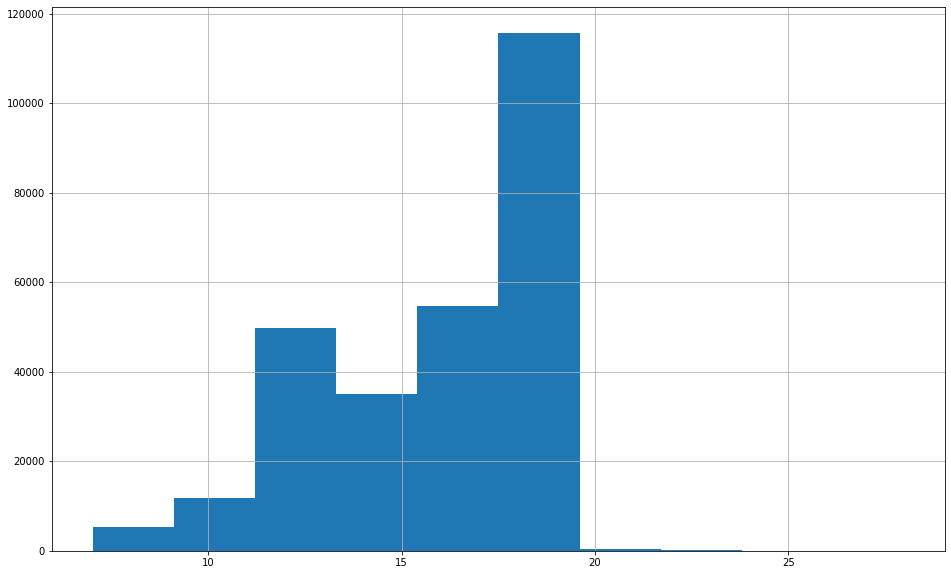

In [70]:
df['OVERALL_SCORE_10'].hist(figsize=(16,10), bins=10);

In [75]:
df['OVERALL_SCORE_15'] = df['RECENCY_DAYS_w_15'] + df['FREQUENCY_w_15'] + df['MONETARY_VALUE_w_15']
df.groupby('OVERALL_SCORE_15')['RECENCY_DAYS','FREQUENCY','MONETARY_VALUE'].aggregate(['count', np.median, 'mean'])

c:\users\zuzan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


RECENCY_DAYS                      FREQUENCY            \
                        count  median         mean     count    median   
OVERALL_SCORE_15                                                         
9.0                         1  1373.0  1373.000000         1      46.0   
12.0                     3484  1389.0  1388.632893      3484       5.0   
13.0                     3582  1320.0  1319.953657      3582       9.0   
14.0                     2685  1252.0  1251.379516      2685      10.0   
15.0                     4325  1178.0  1178.303121      4325      10.0   
16.0                     6857  1109.0  1110.477031      6857       7.0   
17.0                    33041  1018.0  1023.893829     33041       1.0   
18.0                     8572   977.0   977.472702      8572       8.0   
19.0                     8001   912.0   909.672416      8001      13.0   
20.0                     8915   832.0   834.946270      8915      12.0   
21.0                    14325   768.0   769.040070     14325      13.0   
22.0                    16414   701.0   700.628975     16414      15.0   
23.0                    17512   631.0   631.922453     17512      17.0   
24.0                    21025   568.0   566.481094     21025      20.0   
25.0                    19581   489.0   490.450539     19581      23.0   
26.0                   103259   397.0   406.787234    103259      85.0   
27.0                      612   392.0   414.807190       612   19364.0   
28.0                      311   392.0   409.594855       311   32561.0   
29.0                      172   392.0   413.831395       172   47181.0   
30.0                      116   391.0   402.758621       116   60547.5   
31.0                       74   391.0   411.364865        74   72786.0   
32.0                       47   392.0   417.191489        47   84367.0   
33.0                       24   391.0   394.875000        24   96280.5   
34.0                       15   392.0   413.266667        15  108282.0   
35.0                       13   391.0   397.923077        13  112796.0   
36.0                       11   391.0   391.545455        11  132187.0   
37.0                        6   391.0   391.000000         6  144345.0   
38.0                        2   391.0   391.000000         2  152224.5   
41.0                        4   395.5   401.250000         4  193868.5   

                                MONETARY_VALUE                             
                           mean          count       median          mean  
OVERALL_SCORE_15                                                           
9.0                   46.000000              1 -408912448.0 -4.089124e+08  
12.0                  32.788175           3484       6500.0 -4.414498e+02  
13.0                  85.491625           3582      10000.0  6.232062e+04  
14.0                 166.509870           2685      10000.0  8.562059e+04  
15.0                 130.003699           4325      10640.0  9.224990e+04  
16.0                 132.531574           6857       6000.0  1.432584e+05  
17.0                  31.036470          33041       1000.0  3.056306e+04  
18.0                 156.750933           8572       7000.0  1.069528e+03  
19.0                 182.169854           8001      11000.0  1.828839e+05  
20.0                 218.606730           8915      10130.0  2.044696e+05  
21.0                 208.709250          14325      11100.0  2.145701e+05  
22.0                 196.346290          16414      13000.0  1.109839e+05  
23.0                 238.422739          17512      14000.0  2.360904e+05  
24.0                 257.082045          21025      15000.0  2.492583e+05  
25.0                 285.042439          19581      15438.0  1.955367e+05  
26.0                 421.494630         103259      56820.0  4.323148e+05  
27.0               21501.455882            612   19550086.5  2.257333e+07  
28.0               34487.221865            311   32594805.0  3.528614e+07  
29.0               48619.633721            172   441

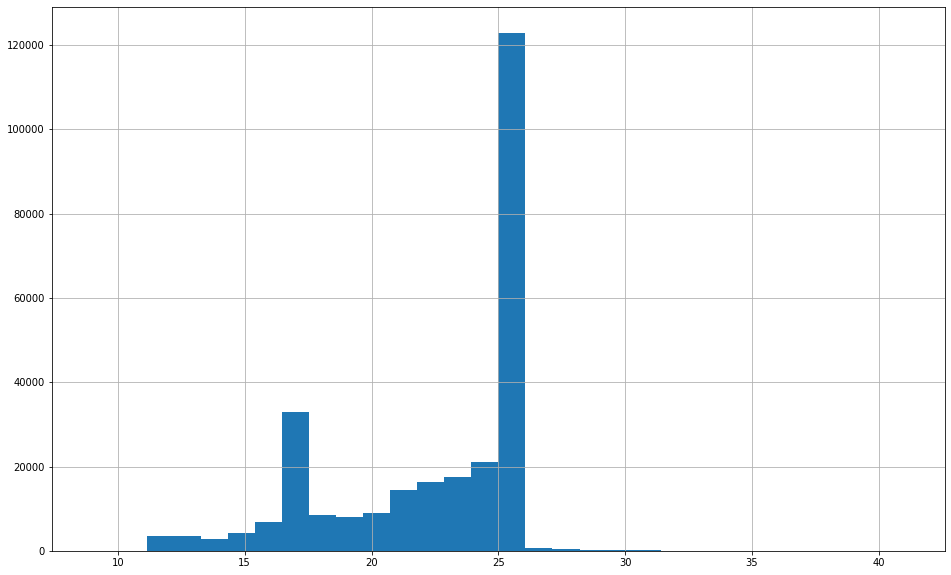

In [76]:
df['OVERALL_SCORE_15'].hist(figsize=(16,10), bins=30);